<center><img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png" title="Title text" width="30%" /></center>
<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 Aprendizaje Automático </h1>

<H3 align='center'> Taller 3 </H3>
<hr style="height:2px;border:none"/>
<H3 align='center'> Grupo - Colo-Colo 2006  </H3>
<hr style="height:2px;border:none"/>

# Integrantes 

* Javier Fuentes 
* Maryon Morales
* Javiera Moreno

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,roc_auc_score
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import re
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from copy import deepcopy
import sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
import joblib
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
path=r'C:\Users\HP\Desktop\U\2 Semestre 2022\ML\Talleres\modelamiento-de-supervivencia-de-pacientes-en-uci\\'

# EDA

In [2]:
df_train = pd.read_csv('df_train.csv')
df_train.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,98554,3413,60,0,NaN,28.357077,0,Asian,NaN,154.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,70232,19980,139,0,NaN,24.547793,1,African American,NaN,154.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
2,24701,54659,39,0,NaN,24.284760,1,Caucasian,NaN,172.7,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Undefined diagnoses
3,68593,8469,176,0,NaN,35.045481,0,Caucasian,NaN,144.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
4,103103,124128,182,0,NaN,19.010652,0,Caucasian,NaN,180.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89713 entries, 0 to 89712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 127.3+ MB


In [4]:
df_train.describe()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,89713.000000,89713.000000,89713.000000,89713.000000,7146.000000,86373.000000,89713.000000,88419.000000,89713.000000,89713.000000,...,81935.000000,81935.000000,89017.000000,89017.000000,89017.000000,89017.000000,89017.000000,89017.000000,89017.000000,89017.000000
mean,65614.688373,65525.210337,105.696187,0.077079,67.813742,29.192224,0.185202,169.646097,508.095683,0.831475,...,0.084294,0.041864,0.000831,0.015581,0.225575,0.012885,0.026006,0.006976,0.004100,0.020648
std,37799.018913,37811.139772,62.834468,0.266718,14.801458,8.258587,0.388463,10.789933,229.127276,2.474884,...,0.245139,0.215385,0.028820,0.123849,0.417963,0.112780,0.159155,0.083232,0.063903,0.142203
min,1.000000,1.000000,2.000000,0.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32855.000000,32828.000000,47.000000,0.000000,59.000000,23.661272,0.000000,162.500000,369.000000,0.035417,...,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65692.000000,65396.000000,109.000000,0.000000,70.000000,27.660186,0.000000,170.100000,504.000000,0.138889,...,0.050000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98372.000000,98277.000000,161.000000,0.000000,79.000000,32.930150,0.000000,177.800000,679.000000,0.409028,...,0.130000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131051.000000,131051.000000,204.000000,1.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,...,0.990000,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df_train.dtypes

encounter_id                     int64
patient_id                       int64
hospital_id                      int64
hospital_death                   int64
age                            float64
                                ...   
leukemia                       float64
lymphoma                       float64
solid_tumor_with_metastasis    float64
apache_3j_bodysystem            object
apache_2_bodysystem             object
Length: 186, dtype: object

In [6]:
row, columns = df_train.shape[0], df_train.shape[1]
row,columns

(89713, 186)

In [7]:
# Verificar si existen duplicados, en caso de que hayan, se eliminan

n_duplicated = df_train.duplicated().sum()
if n_duplicated != 0:
  print(f"Números de textos duplicados: {n_duplicated}")
  df_train.drop_duplicates(inplace=True)

n_duplicated = df_train.duplicated().sum()
print(f"Números de textos duplicados post revisión: {n_duplicated}")

# checking for NaN values.
nan_values=df_train.isna().sum().sum()

print(f"Números de valores nulos {nan_values}")

Números de textos duplicados post revisión: 0
Números de valores nulos 5784487


In [8]:
categorical_val = []
continous_val = []
for column in df_train.columns:
    if len(df_train[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [9]:
categorical_val

['hospital_death',
 'elective_surgery',
 'ethnicity',
 'gender',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type',
 'readmission_status',
 'apache_post_operative',
 'arf_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'intubated_apache',
 'ventilated_apache',
 'aids',
 'cirrhosis',
 'diabetes_mellitus',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis']

In [10]:
df_train[categorical_val]

,hospital_death,elective_surgery,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,readmission_status,apache_post_operative,arf_apache,...,intubated_apache,ventilated_apache,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,0,0,Asian,NaN,Accident & Emergency,admit,Med-Surg ICU,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,African American,NaN,Operating Room / Recovery,admit,Cardiac ICU,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,Caucasian,NaN,Operating Room / Recovery,admit,CCU-CTICU,0,1,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,0,Caucasian,NaN,Accident & Emergency,admit,MICU,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,Caucasian,NaN,Floor,admit,MICU,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89708,0,0,Caucasian,NaN,Floor,admit,MICU,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89709,1,0,Caucasian,M,Accident & Emergency,admit,Neuro ICU,0,0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
89710,0,1,Caucasian,NaN,Operating Room / Recovery,admit,CCU-CTICU,0,1,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89711,0,1,African American,NaN,Operating Room / Recovery,admit,Cardiac ICU,0,1,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df_train[continous_val]

,encounter_id,patient_id,hospital_id,age,bmi,height,hospital_admit_source,icu_id,pre_icu_los_days,weight,...,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,apache_3j_bodysystem,apache_2_bodysystem
0,98554,3413,60,NaN,28.357077,154.90,Emergency Department,538,0.201389,68.04,...,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.06,Sepsis,Cardiovascular
1,70232,19980,139,NaN,24.547793,154.90,NaN,684,0.399306,58.90,...,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.01,Cardiovascular,Cardiovascular
2,24701,54659,39,NaN,24.284760,172.70,Operating Room,619,5.056944,72.43,...,7.36,7.36,117.0,117.0,117.000000,117.000000,0.04,0.01,Cardiovascular,Undefined diagnoses
3,68593,8469,176,NaN,35.045481,144.80,Direct Admit,628,0.000000,73.48,...,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.03,Sepsis,Cardiovascular
4,103103,124128,182,NaN,19.010652,180.30,Acute Care/Floor,506,6.089583,61.80,...,7.42,7.42,113.0,113.0,403.571429,403.571429,0.09,0.02,Neurological,Neurologic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89708,52840,14469,188,NaN,14.844926,170.20,Acute Care/Floor,840,0.000000,40.80,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.00,-1.00,NaN,NaN
89709,107834,123189,19,63.0,25.148009,177.80,Emergency Department,646,0.132639,79.50,...,NaN,NaN,NaN,NaN,NaN,NaN,0.46,0.35,Neurological,Neurologic
89710,125869,107796,21,NaN,25.369438,177.80,Other Hospital,512,0.294444,80.20,...,7.43,7.43,358.0,358.0,358.000000,358.000000,0.04,0.03,Cardiovascular,Cardiovascular
89711,115795,105886,10,NaN,31.703948,185.42,Recovery Room,425,0.004861,109.00,...,7.32,7.32,124.0,124.0,310.000000,310.000000,0.04,0.02,Musculoskeletal/Skin,Undefined diagnoses


In [12]:
df_train.isna().sum()

encounter_id                       0
patient_id                         0
hospital_id                        0
hospital_death                     0
age                            82567
                               ...  
leukemia                         696
lymphoma                         696
solid_tumor_with_metastasis      696
apache_3j_bodysystem            1625
apache_2_bodysystem             1625
Length: 186, dtype: int64

Existe una gran cantidad de datos que están vacíos, por lo tanto es necesario imputar nuevos datos

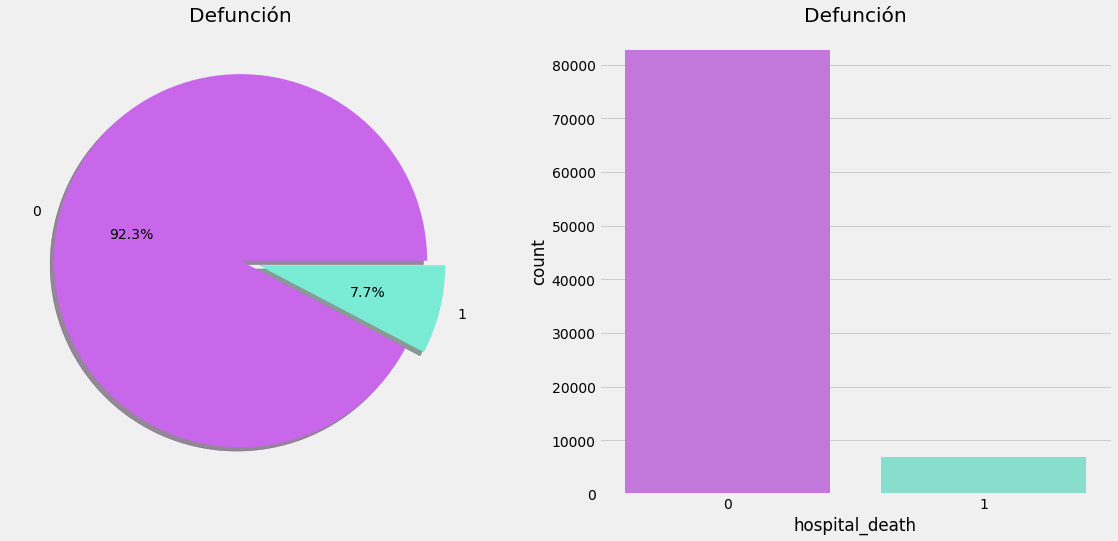

In [16]:
f,ax=plt.subplots(1,2,figsize=(18,8))
colors = ['#C967EB', '#7AEBD5']
df_train['hospital_death'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True,colors = colors)
ax[0].set_title('Defunción')
ax[0].set_ylabel('')
sns.countplot(x='hospital_death',data=df_train,palette = colors)
ax[1].set_title('Defunción')
plt.show()

Problema completamente desbalanceado

In [17]:
df_train.groupby(['gender','hospital_death'])['hospital_death'].count()

gender  hospital_death
F       0                  381
        1                 3272
M       0                  446
        1                 3635
Name: hospital_death, dtype: int64

In [18]:
df_train.groupby(['ethnicity','hospital_death'])['hospital_death'].count()

ethnicity         hospital_death
African American  0                  8683
                  1                   640
Asian             0                  1028
                  1                    86
Caucasian         0                 63756
                  1                  5390
Hispanic          0                  3380
                  1                   333
Native American   0                   710
                  1                    62
Other/Unknown     0                  3966
                  1                   309
Name: hospital_death, dtype: int64

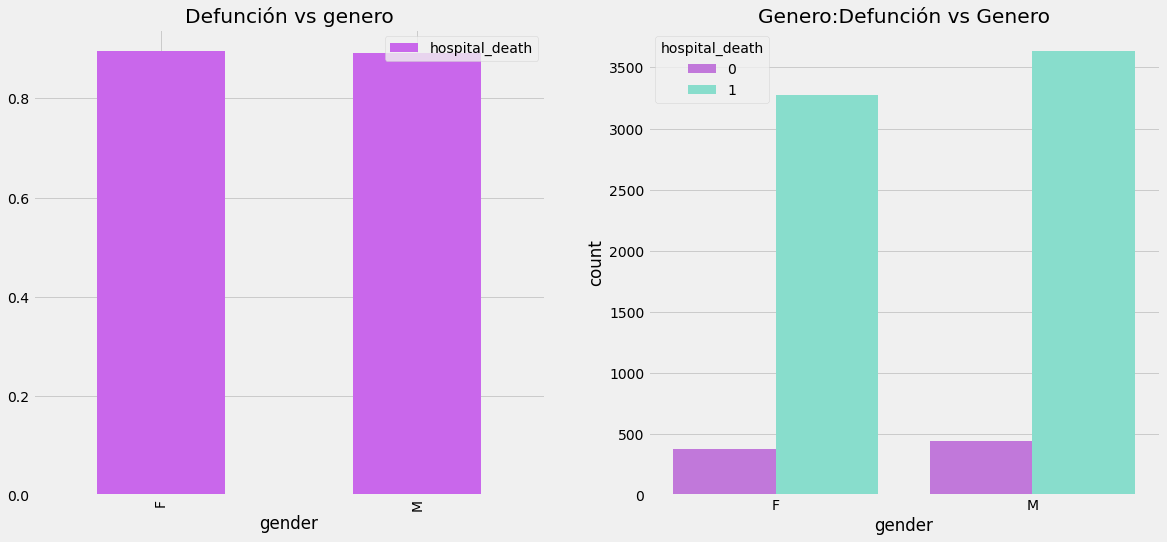

In [19]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train[['gender','hospital_death']].groupby(['gender']).mean().plot.bar(ax=ax[0],color = colors)
ax[0].set_title('Defunción vs genero')
sns.countplot(x='gender',hue="hospital_death",data=df_train,ax=ax[1],palette = colors)
ax[1].set_title('Genero:Defunción vs Genero')
plt.show()

La mayoría de los datos con género son aquellas personas que han fallecido, es debido a esto que se puede ver como existen más casos de personas fallecidas que sobrevivientes.

Separación por edades

In [20]:
print('Persona más mayor tiene:',df_train['age'].max(),'Years')
print('La persona más joven tiene:',df_train['age'].min(),'Years')
print('El promedio de edad es de:',df_train['age'].mean(),'Years')

Persona más mayor tiene: 89.0 Years
La persona más joven tiene: 16.0 Years
El promedio de edad es de: 67.81374195354044 Years


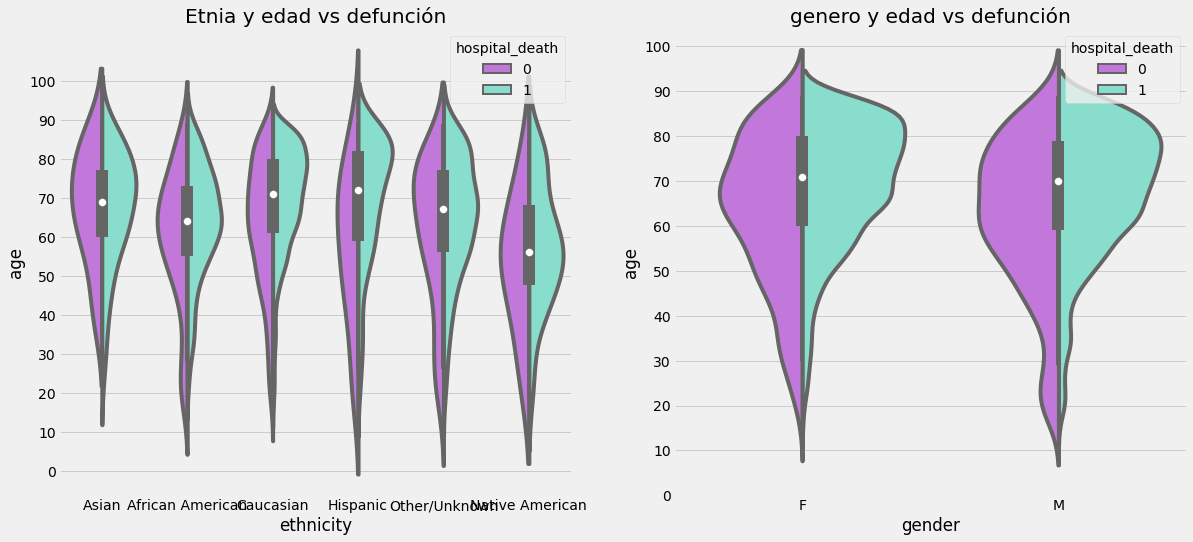

In [25]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="ethnicity",y="age", hue="hospital_death", data=df_train,split=True,ax=ax[0], palette = colors)
ax[0].set_title('Etnia y edad vs defunción')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="gender",y="age", hue="hospital_death", data=df_train,split=True,ax=ax[1],palette = colors)
ax[1].set_title('genero y edad vs defunción')
ax[1].set_yticks(range(0,110,10))
plt.show()

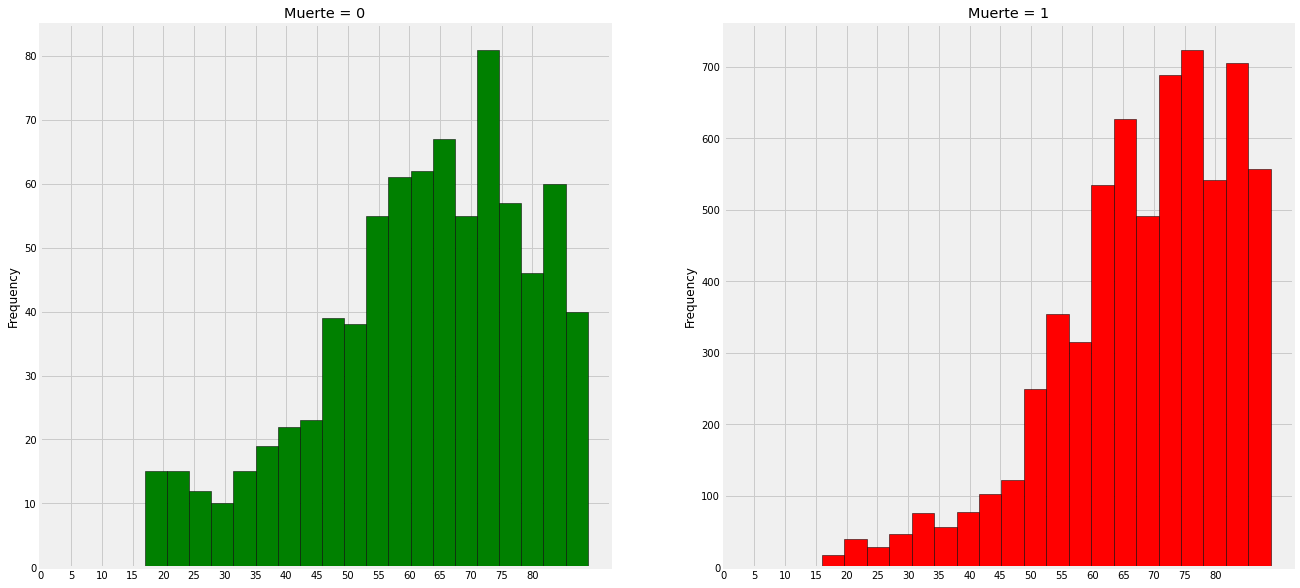

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
df_train[df_train['hospital_death']==0].age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='green')
ax[0].set_title('Muerte = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
df_train[df_train['hospital_death']==1].age.plot.hist(ax=ax[1],color='red',bins=20,edgecolor='black')
ax[1].set_title('Muerte = 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

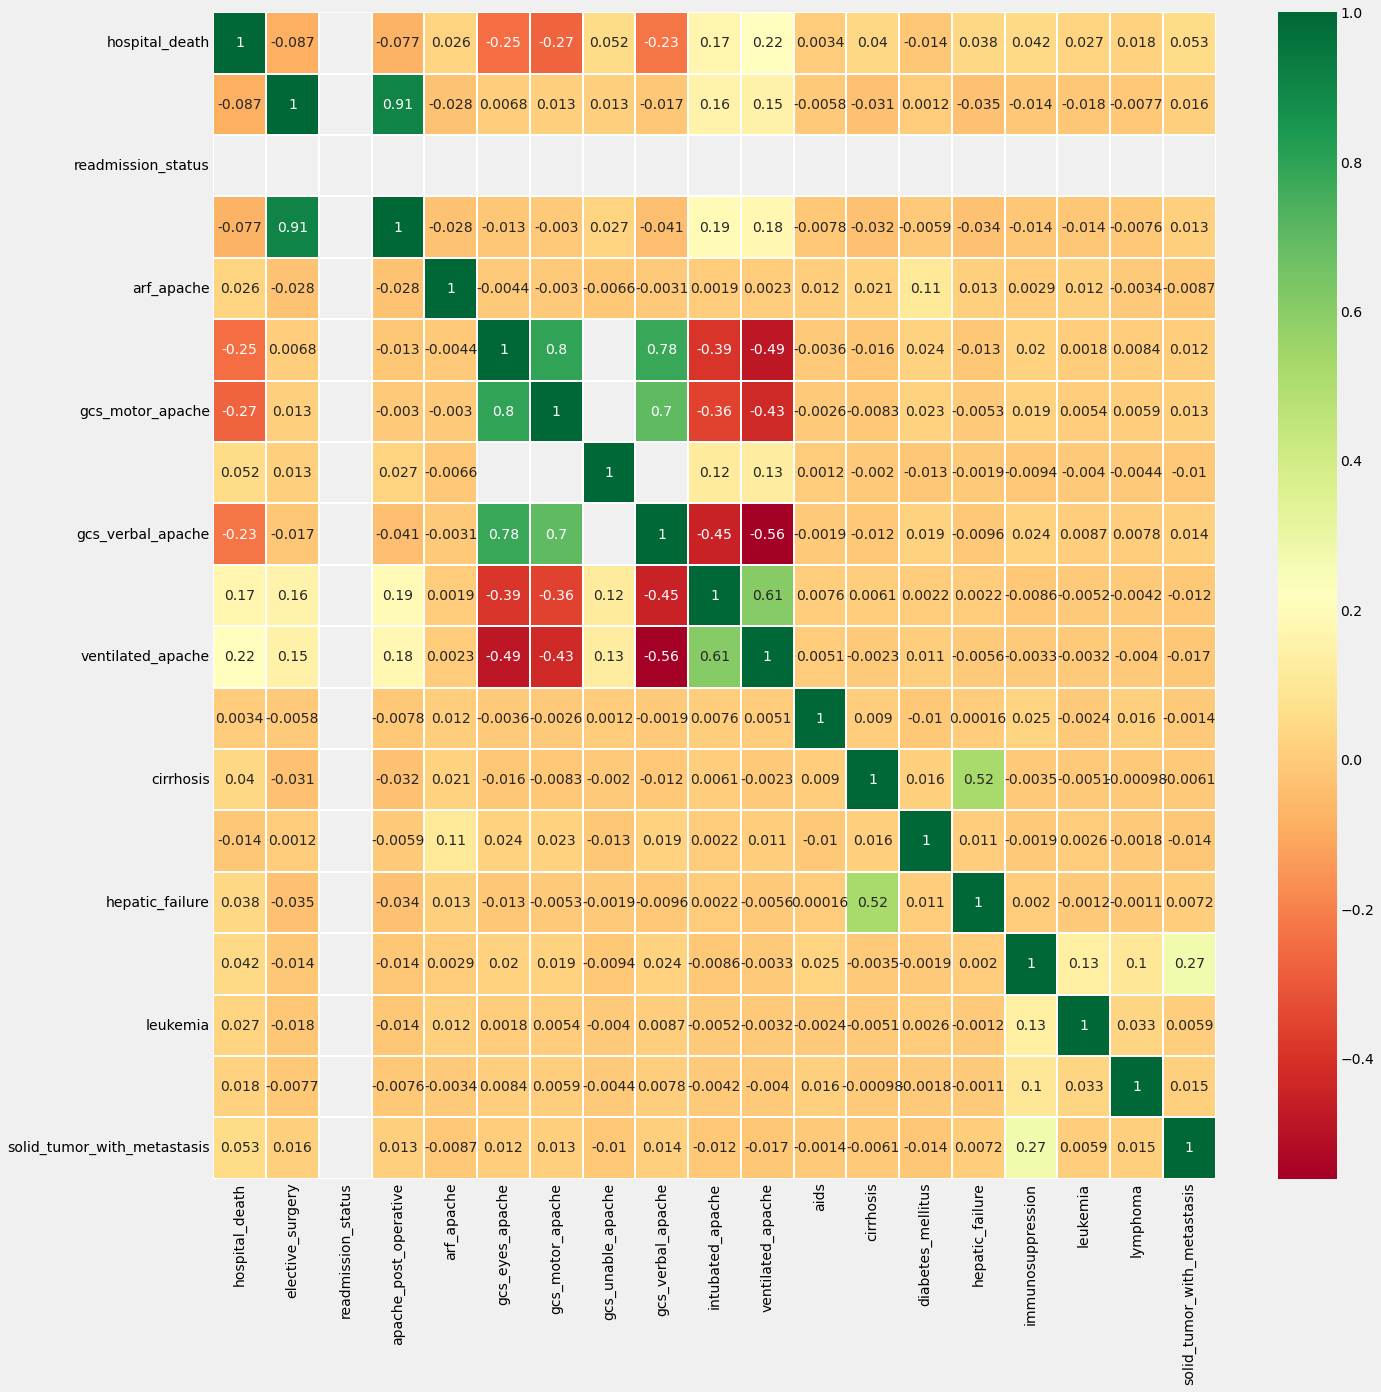

In [27]:
sns.heatmap(df_train[categorical_val].corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,20
                    )
plt.show()

# Tratamiento de Datos

In [ ]:
df_train['hospital_id'].unique().size

147

In [ ]:
df_train['hospital_death'].value_counts()

0    82798
1     6915
Name: hospital_death, dtype: int64

In [ ]:
df_train['encounter_id'].unique().size

89713

In [ ]:
df_train['patient_id'].unique().size

89713


Notemos que `encounter_id` y `patient_id` tienen 89713 registros, lo que es igual al número de registros totales, por lo que solo los utilizaremos como identificadores, mientras que el consideramos que `hospital_id` podría ser de utilidad, por lo que la trataremos como una variable categórica


In [3]:
ids=df_train[['encounter_id','patient_id']]
target=df_train['hospital_death']
df_train=df_train.drop(columns=['encounter_id','patient_id','hospital_death'])

In [4]:
#obtengo las columnas categoricas y le agrego el hospital_id
categorical = [var for var in df_train.columns if df_train[var].dtype=='O']
categorical.append('hospital_id')
categorical

['ethnicity',
 'gender',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type',
 'apache_3j_bodysystem',
 'apache_2_bodysystem',
 'hospital_id']

Exploramos algunas variables categóricas para identificar valores que signifiquen lo mismo

In [ ]:
df_train['ethnicity'].unique()
df_train['gender'].unique()
df_train['hospital_admit_source'].unique()
df_train['icu_admit_source'].unique()
df_train['icu_admit_source'].unique()
df_train['icu_stay_type'].unique()

array(['admit', 'transfer', 'readmit'], dtype=object)

In [5]:
#train categorical + imputación con la moda
train_c=df_train[categorical]
#mode_c=train_c.mode().iloc[0] #esta misma moda se va a utilizar para el test
#train_c=train_c.fillna(mode_c)
train_c.isna().sum()

ethnicity                 1370
gender                   81979
hospital_admit_source    20975
icu_admit_source           112
icu_stay_type                0
icu_type                     0
apache_3j_bodysystem      1625
apache_2_bodysystem       1625
hospital_id                  0
dtype: int64

In [6]:
#para obtener las columnas binarias
d=df_train.describe()
d=d.T
d=d[d["min"]==0]
d=d[d["max"]==1]
d

,count,mean,std,min,25%,50%,75%,max
elective_surgery,89713.0,0.185202,0.388463,0.0,0.0,0.0,0.0,1.0
apache_post_operative,89713.0,0.202590,0.401932,0.0,0.0,0.0,0.0,1.0
arf_apache,89017.0,0.027781,0.164346,0.0,0.0,0.0,0.0,1.0
gcs_unable_apache,88703.0,0.009470,0.096852,0.0,0.0,0.0,0.0,1.0
intubated_apache,89017.0,0.149320,0.356405,0.0,0.0,0.0,0.0,1.0
ventilated_apache,89017.0,0.322096,0.467282,0.0,0.0,0.0,1.0,1.0
aids,89017.0,0.000831,0.028820,0.0,0.0,0.0,0.0,1.0
cirrhosis,89017.0,0.015581,0.123849,0.0,0.0,0.0,0.0,1.0
diabetes_mellitus,89017.0,0.225575,0.417963,0.0,0.0,0.0,0.0,1.0
hepatic_failure,89017.0,0.012885,0.112780,0.0,0.0,0.0,0.0,1.0


In [7]:
#train binary + imputación con la moda
binary=d.index.tolist()
train_b=df_train[binary]
#mode_b=train_b.mode().iloc[0] #esta misma moda se va a utilizar para el test
#train_b=train_b.fillna(mode_b)
train_b.isna().sum()

elective_surgery                  0
apache_post_operative             0
arf_apache                      696
gcs_unable_apache              1010
intubated_apache                696
ventilated_apache               696
aids                            696
cirrhosis                       696
diabetes_mellitus               696
hepatic_failure                 696
immunosuppression               696
leukemia                        696
lymphoma                        696
solid_tumor_with_metastasis     696
dtype: int64

In [13]:
#para obtener las variables numéricas que no son binarias y las imputo con la media
numerical = [var for var in df_train.columns if df_train[var].dtype!='O']
train_n= df_train[numerical]
train_n=train_n.drop(columns=binary)
train_n=train_n.drop(columns=['hospital_id'])
mean=train_n.mean() #esta misma media se va a utilizar para el test
train_n=train_n.fillna(mean)
#train_n['age']=train_n['age'].astype(int) #iba a dejar la edad como entero, pero después hay que estandarizar así que no tiene mucho sentido
train_n

,age,bmi,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,...,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob
0,67.813742,28.357077,154.90,538,0.201389,0,68.04,2.600000,113.00000,501.060000,...,44.669398,43.384614,7.339143,7.328645,163.963688,144.106884,244.886776,236.456609,0.10,0.06
1,67.813742,24.547793,154.90,684,0.399306,0,58.90,2.908558,202.00000,1205.010000,...,44.669398,43.384614,7.339143,7.328645,163.963688,144.106884,244.886776,236.456609,0.02,0.01
2,67.813742,24.284760,172.70,619,5.056944,0,72.43,3.500000,308.00000,1207.010000,...,38.000000,38.000000,7.360000,7.360000,117.000000,117.000000,117.000000,117.000000,0.04,0.01
3,67.813742,35.045481,144.80,628,0.000000,0,73.48,3.500000,113.00000,501.050000,...,44.669398,43.384614,7.339143,7.328645,163.963688,144.106884,244.886776,236.456609,0.05,0.03
4,67.813742,19.010652,180.30,506,6.089583,0,61.80,2.908558,120.00000,407.010000,...,40.000000,40.000000,7.420000,7.420000,113.000000,113.000000,403.571429,403.571429,0.09,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89708,67.813742,14.844926,170.20,840,0.000000,0,40.80,2.908558,185.62643,560.044262,...,44.669398,43.384614,7.339143,7.328645,163.963688,144.106884,244.886776,236.456609,-1.00,-1.00
89709,63.000000,25.148009,177.80,646,0.132639,0,79.50,2.908558,121.00000,409.020000,...,44.669398,43.384614,7.339143,7.328645,163.963688,144.106884,244.886776,236.456609,0.46,0.35
89710,67.813742,25.369438,177.80,512,0.294444,0,80.20,2.908558,202.00000,1209.020000,...,43.000000,43.000000,7.430000,7.430000,358.000000,358.000000,358.000000,358.000000,0.04,0.03
89711,67.813742,31.703948,185.42,425,0.004861,0,109.00,3.100000,308.00000,1902.050000,...,50.000000,50.000000,7.320000,7.320000,124.000000,124.000000,310.000000,310.000000,0.04,0.02


# Ranking de las variables más importantes

In [14]:
from sklearn.feature_selection import SelectKBest, f_regression
rank=SelectKBest(f_regression, k=10)
rank.fit(train_n, target)
cols = rank.get_support(indices=True)
ranking = train_n.iloc[:,cols]
ranking

,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,d1_spo2_min,d1_sysbp_min,d1_sysbp_noninvasive_min,d1_lactate_max,d1_lactate_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob
0,4.000000,6.00000,5.000000,95.0,71.0,71.0,2.8746,2.089789,0.10,0.06
1,4.000000,6.00000,5.000000,97.0,138.0,138.0,2.8746,2.089789,0.02,0.01
2,4.000000,6.00000,5.000000,94.0,85.0,85.0,2.8746,2.089789,0.04,0.01
3,3.000000,6.00000,4.000000,85.0,78.0,78.0,2.8746,2.089789,0.05,0.03
4,4.000000,5.00000,4.000000,100.0,78.0,78.0,2.8746,2.089789,0.09,0.02
...,...,...,...,...,...,...,...,...,...,...
89708,3.472952,5.48282,4.007478,89.0,71.0,71.0,2.8746,2.089789,-1.00,-1.00
89709,1.000000,2.00000,1.000000,87.0,94.0,94.0,2.8746,2.089789,0.46,0.35
89710,4.000000,6.00000,5.000000,84.0,89.0,89.0,2.8746,2.089789,0.04,0.03
89711,3.000000,6.00000,1.000000,94.0,86.0,86.0,1.2000,1.200000,0.04,0.02


[0.21848191 0.00466999 0.0043777  0.00443618 0.00582237 0.
 0.00466844 0.00467769 0.00562436 0.00678311 0.00443944 0.0058372
 0.00494609 0.00693252 0.01172021 0.01834276 0.01457953 0.00443204
 0.0057056  0.0042004  0.00470691 0.00359134 0.00384087 0.00349103
 0.00683134 0.00508195 0.00437818 0.00901436 0.00416521 0.00502636
 0.00306936 0.00363889 0.00422717 0.00611095 0.00435032 0.00622986
 0.00573659 0.00928049 0.00297439 0.00367991 0.00435448 0.00805656
 0.00442466 0.00747996 0.00488343 0.00596385 0.00503818 0.01089641
 0.00327476 0.00489216 0.00459419 0.00895975 0.00474561 0.0076964
 0.00728097 0.00934471 0.00175838 0.00186704 0.00427566 0.00441824
 0.0040406  0.004372   0.00458536 0.00464319 0.00178152 0.0018343
 0.00411716 0.00443239 0.00418045 0.00471844 0.00507913 0.00537611
 0.00485232 0.00508855 0.00187208 0.00184826 0.00424966 0.00470697
 0.00430944 0.00475139 0.00508716 0.00554884 0.00460264 0.0052985
 0.00444249 0.00468596 0.00717899 0.00661572 0.00457005 0.00480974
 0.0052

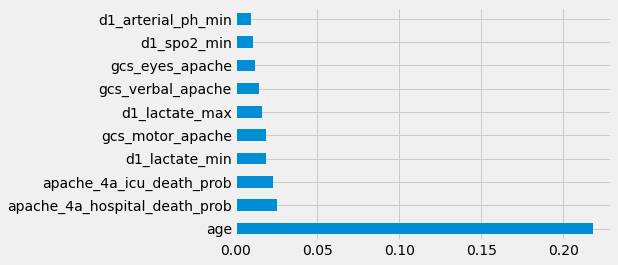

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(train_n,target)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=train_n.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Continuación Tratamiento de Datos

In [9]:
#Estandarizamos las columnas numéricas no binarias
scaler = StandardScaler()
scaler.fit(train_n)
train_n[:] = scaler.transform(train_n) #para test solo usaremos transform, no fit
train_n.head()

,age,bmi,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,...,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob
0,NaN,-0.101125,-1.366661,0.130515,-0.254593,0.0,-0.641000,-0.453478,-0.843938,-0.127051,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.064071,0.084201
1,NaN,-0.562379,-1.366661,0.767719,-0.174623,0.0,-1.006867,NaN,0.190265,1.389248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.262276,-0.147942
2,NaN,-0.594229,0.283034,0.484032,1.707350,0.0,-0.465272,0.869225,1.422012,1.393556,...,-0.457123,-0.382451,0.198654,0.293031,-0.414739,-0.276369,-0.985325,-0.945018,-0.180690,-0.147942
3,NaN,0.708752,-2.302724,0.523312,-0.335967,0.0,-0.423242,0.869225,-0.843938,-0.127073,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.139896,-0.055085
4,NaN,-1.232854,0.987398,-0.009146,2.124599,0.0,-0.890783,NaN,-0.762596,-0.329634,...,-0.320042,-0.240398,0.770126,0.853772,-0.450063,-0.317151,1.222612,1.322041,0.023278,-0.101514


In [10]:
train_c=pd.get_dummies(data=train_c)
train = pd.concat([train_n,train_c,train_b], axis=1)
train=train.reindex(sorted(train.columns), axis=1)
train

,age,aids,albumin_apache,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,...,pre_icu_los_days,readmission_status,resprate_apache,sodium_apache,solid_tumor_with_metastasis,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,weight
0,NaN,0.0,-0.453478,1,0,0,0,0,0,0,...,-0.254593,0.0,2.133941,-0.373341,0.0,NaN,-0.308669,0.0,-1.454060,-0.641000
1,NaN,0.0,NaN,1,0,0,0,0,0,0,...,-0.174623,0.0,1.074499,-0.373341,0.0,-0.265930,-0.639477,0.0,-0.261608,-1.006867
2,NaN,0.0,0.869225,0,0,0,0,0,0,0,...,1.707350,0.0,-1.441678,0.386513,0.0,-0.630208,NaN,1.0,0.240094,-0.465272
3,NaN,0.0,0.869225,1,0,0,0,0,0,0,...,-0.335967,0.0,0.081271,2.286148,0.0,NaN,-0.606193,0.0,-0.859289,-0.423242
4,NaN,0.0,NaN,0,0,0,0,1,0,0,...,2.124599,0.0,-1.441678,-0.943232,0.0,-0.873061,-0.742429,0.0,NaN,-0.890783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89708,NaN,0.0,NaN,0,0,0,0,0,0,0,...,-0.335967,0.0,-0.647096,-2.462940,0.0,-0.023077,0.333322,0.0,NaN,-1.731396
89709,-0.325244,0.0,NaN,0,0,0,0,1,0,0,...,-0.282373,0.0,0.610993,-0.563305,0.0,0.584054,NaN,1.0,0.775243,-0.182266
89710,NaN,0.0,NaN,1,0,0,0,0,0,0,...,-0.216993,0.0,-1.309247,-0.183378,0.0,-3.180159,-0.228801,1.0,-0.622252,-0.154245
89711,NaN,0.0,0.281357,0,0,0,0,0,0,0,...,-0.334003,0.0,0.677208,0.196549,0.0,0.341201,0.508210,1.0,0.174655,0.998595


# Imputación de datos

Como segunda prueba, realizamos la imputación de todos los datos ya procesados usando KNN Imputer, para pruebas se realizó el fit solo en una porción de los datos, ya que demoraba aproximadamente 2 a 3 horas en hacer el fit en todos los datos.

In [22]:
imputerknn = KNNImputer(n_neighbors=5)
imputerknn.fit(train[:20000])
train_imputeknn = pd.DataFrame(imputerknn.transform(train),columns = train.columns)
train_imputeknn

,age,aids,albumin_apache,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,...,pre_icu_los_days,readmission_status,resprate_apache,sodium_apache,solid_tumor_with_metastasis,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,weight
0,-0.109034,0.0,-0.453478,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.254593,0.0,2.133941,-0.373341,0.0,-0.533067,-0.308669,0.0,-1.454060,-0.641000
1,-0.109034,0.0,0.428324,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.174623,0.0,1.074499,-0.373341,0.0,-0.265930,-0.639477,0.0,-0.261608,-1.006867
2,0.404465,0.0,0.869225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.707350,0.0,-1.441678,0.386513,0.0,-0.630208,0.030286,1.0,0.240094,-0.465272
3,0.458518,0.0,0.869225,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.335967,0.0,0.081271,2.286148,0.0,-0.945917,-0.606193,0.0,-0.859289,-0.423242
4,-0.041468,0.0,0.251963,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.124599,0.0,-1.441678,-0.943232,0.0,-0.873061,-0.742429,0.0,-0.121423,-0.890783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89708,-0.041468,0.0,-0.512265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.335967,0.0,-0.647096,-2.462940,0.0,-0.023077,0.333322,0.0,-0.049294,-1.731396
89709,-0.325244,0.0,0.839831,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.282373,0.0,0.610993,-0.563305,0.0,0.584054,-0.531753,1.0,0.775243,-0.182266
89710,0.566623,0.0,0.251963,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.216993,0.0,-1.309247,-0.183378,0.0,-3.180159,-0.228801,1.0,-0.622252,-0.154245
89711,0.120690,0.0,0.281357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.334003,0.0,0.677208,0.196549,0.0,0.341201,0.508210,1.0,0.174655,0.998595


Además de KNN quisimos probar 2 formas más de imputación, el primero MICE imputer (IterativeImputer) y Miss Forest (que utiliza random forest), solo logramos que corriera el primero, pero inmediatamente nos quedamos sin memoria, por lo que no fue posible probarlo en la data de test.

In [ ]:
#Imputación con Iterative Imputer
def miceImputer(df,):
    df_ = deepcopy(df)
    imputermice = IterativeImputer(max_iter=10, random_state=19, sample_posterior=True)
    return pd.DataFrame(imputermice.fit_transform(df_), columns=df_.columns),imputermice

train_imputemice,miceimputer = miceImputer(train[:10000])
train_imputemice

In [ ]:
#Imputación con Random Forest
imputerf = MissForest()
imputerf.fit(train[:10000])
train_imputef = imputerf.transform(train)
train_imputef.isna().sum()

MissForest()

In [ ]:
#para guardar el modelo y el train imputado
joblib.dump(imputerknn, 'knnimputer.pkl')
train_imputeknn.to_csv('train_imputeknn.csv', encoding='utf-8', index=False)

In [23]:
#para cargar el modelo y el train imputado
pickled_model = pickle.load(open('knnimputer.pkl', 'rb'))
train_impute=pd.read_csv(path+"train_imputeknn (2).csv")

In [27]:
#train_impute = train_imputeknn

In [12]:
train_impute.isna().sum()

age                                     0
aids                                    0
albumin_apache                          0
apache_2_bodysystem_Cardiovascular      0
apache_2_bodysystem_Gastrointestinal    0
                                       ..
temp_apache                             0
urineoutput_apache                      0
ventilated_apache                       0
wbc_apache                              0
weight                                  0
Length: 235, dtype: int64

# SELECCIÓN DE MODELOS
## AdaBoostClassifier + DecisionTreeClassifier (Ensamblado)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced'))

parameters = {'base_estimator__criterion':['gini','entropy','log_loss'] ,
              'base_estimator__splitter':['best','random'],
              'n_estimators': [100, 200,300]}

clf1 = GridSearchCV(abc, parameters,verbose=3,scoring='f1', n_jobs=-1,cv=5)
clf1.fit(train_impute,target)
print(clf1.best_estimator_)
print(clf1.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END base_estimator__criterion=gini, base_estimator__splitter=best, n_estimators=100;, score=0.907 total time=   3.9s
[CV 2/5] END base_estimator__criterion=gini, base_estimator__splitter=best, n_estimators=100;, score=0.902 total time=   3.3s
[CV 3/5] END base_estimator__criterion=gini, base_estimator__splitter=best, n_estimators=100;, score=0.906 total time=   3.8s
[CV 4/5] END base_estimator__criterion=gini, base_estimator__splitter=best, n_estimators=100;, score=0.909 total time=   3.5s
[CV 5/5] END base_estimator__criterion=gini, base_estimator__splitter=best, n_estimators=100;, score=0.904 total time=   4.0s
[CV 1/5] END base_estimator__criterion=gini, base_estimator__splitter=best, n_estimators=200;, score=0.909 total time=   3.9s
[CV 2/5] END base_estimator__criterion=gini, base_estimator__splitter=best, n_estimators=200;, score=0.908 total time=   3.2s
[CV 3/5] END base_estimator__criterion=gini, base_estimat

[CV 5/5] END base_estimator__criterion=log_loss, base_estimator__splitter=best, n_estimators=100;, score=0.910 total time=   2.7s
[CV 1/5] END base_estimator__criterion=log_loss, base_estimator__splitter=best, n_estimators=200;, score=0.922 total time=   2.8s
[CV 2/5] END base_estimator__criterion=log_loss, base_estimator__splitter=best, n_estimators=200;, score=0.921 total time=   2.2s
[CV 3/5] END base_estimator__criterion=log_loss, base_estimator__splitter=best, n_estimators=200;, score=0.911 total time=   3.0s
[CV 4/5] END base_estimator__criterion=log_loss, base_estimator__splitter=best, n_estimators=200;, score=0.914 total time=   2.9s
[CV 5/5] END base_estimator__criterion=log_loss, base_estimator__splitter=best, n_estimators=200;, score=0.913 total time=   2.9s
[CV 1/5] END base_estimator__criterion=log_loss, base_estimator__splitter=best, n_estimators=300;, score=0.917 total time=   3.0s
[CV 2/5] END base_estimator__criterion=log_loss, base_estimator__splitter=best, n_estimato

## DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier


dtc = DecisionTreeClassifier(class_weight='balanced')

param_grid = {'criterion':['gini','entropy','log_loss'] ,
            'splitter':['best','random'],
              }


clf2 = GridSearchCV(estimator=dtc, param_grid=param_grid, n_jobs=-1, cv= 5,scoring = 'f1',
                           verbose=3)
clf2.fit(train_impute, target)
print(clf2.best_estimator_)
print(clf2.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .....criterion=gini, splitter=best;, score=0.914 total time=   3.8s
[CV 2/5] END .....criterion=gini, splitter=best;, score=0.908 total time=   3.0s
[CV 3/5] END .....criterion=gini, splitter=best;, score=0.903 total time=   4.2s
[CV 4/5] END .....criterion=gini, splitter=best;, score=0.911 total time=   4.2s
[CV 5/5] END .....criterion=gini, splitter=best;, score=0.904 total time=   3.8s
[CV 1/5] END ...criterion=gini, splitter=random;, score=0.905 total time=   0.7s
[CV 2/5] END ...criterion=gini, splitter=random;, score=0.908 total time=   0.5s
[CV 3/5] END ...criterion=gini, splitter=random;, score=0.904 total time=   0.6s
[CV 4/5] END ...criterion=gini, splitter=random;, score=0.907 total time=   0.6s
[CV 5/5] END ...criterion=gini, splitter=random;, score=0.902 total time=   0.7s
[CV 1/5] END ..criterion=entropy, splitter=best;, score=0.919 total time=   3.1s
[CV 2/5] END ..criterion=entropy, splitter=best;,

## Logistic Regression

In [30]:
parameters_lr = [{'solver': ['newton-cg', 'lbfgs', 'liblinear']},
                {'penalty':['none', 'elasticnet', 'l1', 'l2']},
                {'C':[0.1, 1, 10]}]



lr = LogisticRegression(class_weight='balanced')


clf3 = GridSearchCV(estimator = lr,
                            param_grid = parameters_lr,
                            scoring = 'f1',
                            n_jobs=-1,
                            verbose=3)
clf3.fit(train_impute, target)
print(clf3.best_estimator_)
print(clf3.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
LogisticRegression(class_weight='balanced', penalty='none')
0.9438760107095268


## RandomForestClassifier

In [47]:
rfc = RandomForestClassifier(class_weight='balanced')

param_grid = { 
    'n_estimators': [100,300,1000],
    'max_features': ['sqrt', 'log2']
    }


clf4 = GridSearchCV(estimator=rfc, param_grid=param_grid,cv=5,scoring = 'f1',
                            n_jobs=-1,
                           verbose=3)
clf4.fit(train_impute, target)
print(clf4.best_estimator_)
print(clf4.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
RandomForestClassifier(class_weight='balanced')
0.8706930756152298


## XGBClassifier

In [ ]:
from xgboost import XGBClassifier


parameters = {'objective':['binary:logistic'],
              'learning_rate': [0.01,0.1,1], #so called `eta` value
              'min_child_weight': [1,10],
              'max_delta_step':[0,10,100],
              'n_estimators': [1000], #number of trees, change it to 1000 for better results
              }

xgb_model = XGBClassifier(class_weight='balanced')
clf6 = GridSearchCV(xgb_model, parameters,cv=5, n_jobs=-1,
                   scoring='f1',
                   verbose=3)

clf6.fit(train_impute, target)
print(clf6.best_estimator_)
print(clf6.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


De los 40 diferentes modelos probados, el que mejor f1 score tuvo fue sorpresivamente LogisticRegression(class_weight='balanced', penalty='none') con f1-score=0.9438760107095268 
Es importante notar que todos los modelos base utilizados fueron definidos con class_weight='balanced' dado que sin este los resultados predichos eran muy desbalanceados, esto porque el train está completamente desbalanceado.

# Tratamiento De Datos Test

In [32]:
df_test=pd.read_csv(path+"df_test.csv")
df_test

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,40457,97105,70,75.0,39.393869,0,Caucasian,M,149.80,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
1,107569,17796,188,77.0,31.257801,0,Caucasian,F,154.90,Direct Admit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
2,47462,75743,70,85.0,20.429418,0,African American,F,158.00,Emergency Department,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
3,90920,81758,32,87.0,25.969529,0,Caucasian,F,152.00,Emergency Department,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
4,120041,35432,181,56.0,27.140871,0,Caucasian,M,177.80,Acute Care/Floor,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Genitourinary,Renal/Genitourinary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,80443,9930,89,67.0,28.146291,0,Caucasian,M,167.64,Direct Admit,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1996,48061,62216,21,80.0,33.604801,0,Caucasian,M,165.10,Emergency Department,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
1997,38717,74885,39,73.0,34.399980,0,Caucasian,F,170.20,Direct Admit,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1998,16532,101841,171,58.0,33.641975,1,Caucasian,M,180.00,Operating Room,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular


In [33]:
id_t=df_test['encounter_id']
df_test=df_test.drop(columns=['encounter_id','patient_id'])

In [34]:
test_c=df_test[categorical] #esta misma moda se va a utilizar para el test
#test_c=test_c.fillna(mode_c)
test_c.isna().sum()

ethnicity                 25
gender                     0
hospital_admit_source    434
icu_admit_source           0
icu_stay_type              0
icu_type                   0
apache_3j_bodysystem      37
apache_2_bodysystem       37
hospital_id                0
dtype: int64

In [35]:
test_b=df_test[binary]
#test_b=test_b.fillna(mode_b)
test_b.isna().sum()

elective_surgery                0
apache_post_operative           0
arf_apache                     19
gcs_unable_apache              27
intubated_apache               19
ventilated_apache              19
aids                           19
cirrhosis                      19
diabetes_mellitus              19
hepatic_failure                19
immunosuppression              19
leukemia                       19
lymphoma                       19
solid_tumor_with_metastasis    19
dtype: int64

In [36]:
test_n= df_test[numerical]
test_n=test_n.drop(columns=binary)
test_n=test_n.drop(columns=['hospital_id'])
#test_n=test_n.fillna(mean)
#train_n['age']=train_n['age'].astype(int) #iba a dejar la edad como entero, pero después hay que estandarizar así que no tiene mucho sentido
test_n

,age,bmi,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,...,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob
0,75.0,39.393869,149.80,464,0.002778,0,88.40,NaN,302.0,111.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.01
1,77.0,31.257801,154.90,889,0.100000,0,75.00,3.2,119.0,601.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.61,0.53
2,85.0,20.429418,158.00,464,0.112500,0,51.00,NaN,303.0,211.09,...,38.2,38.2,7.360,7.350,346.0,292.0,346.000000,292.000000,0.30,0.16
3,87.0,25.969529,152.00,369,0.079167,0,60.00,NaN,113.0,502.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.02
4,56.0,27.140871,177.80,814,0.585417,0,85.80,NaN,305.0,901.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,67.0,28.146291,167.64,133,0.000000,0,79.10,2.1,113.0,501.05,...,36.1,36.1,7.524,7.524,73.0,73.0,121.666667,121.666667,0.84,0.81
1996,80.0,33.604801,165.10,504,0.093056,0,91.60,NaN,301.0,403.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.22,0.09
1997,73.0,34.399980,170.20,616,0.000000,0,99.65,4.1,113.0,501.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.31,0.21
1998,58.0,33.641975,180.00,404,0.001389,0,109.00,NaN,302.0,1208.13,...,46.0,41.0,7.480,7.440,365.0,309.0,365.000000,309.000000,0.11,0.09


In [37]:
test_n[:] = scaler.transform(test_n) #para test solo usaremos transform, no fit
test_n.head()

,age,bmi,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,...,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob
0,0.485544,1.235284,-1.839327,-0.192452,-0.334845,0.0,0.173994,NaN,1.352290,-0.967214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.139896,-0.147942
1,0.620675,0.250114,-1.366661,1.662423,-0.295561,0.0,-0.362397,0.428324,-0.774216,0.088240,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.144536,2.266351
2,1.161201,-1.061060,-1.079355,-0.192452,-0.290510,0.0,-1.323098,NaN,1.363911,-0.751643,...,-0.443415,-0.368246,0.198654,0.199575,1.607573,1.50785,0.779044,0.439402,0.879940,0.548488
3,1.296332,-0.390226,-1.635432,-0.607071,-0.303979,0.0,-0.962835,NaN,-0.843938,-0.125005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.139896,-0.101514
4,-0.798203,-0.248392,0.755700,1.335092,-0.099423,0.0,0.069918,NaN,1.387151,0.734479,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.017516,-0.008656


In [38]:
test_c=pd.get_dummies(data=test_c)
test_c

,hospital_id,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_F,gender_M,hospital_admit_source_Acute Care/Floor,...,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,70,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,188,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,70,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,32,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,181,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,89,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1996,21,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1997,39,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1998,171,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [39]:
[x for x in test_c.columns.tolist() if x not in train_c.columns.tolist()]

[]

In [40]:
[x for x in train_c.columns.tolist() if x not in test_c.columns.tolist()]

['hospital_admit_source_Observation', 'hospital_admit_source_Other']

In [41]:
test_c['hospital_admit_source_Observation']=0
test_c['hospital_admit_source_Other']=0


In [42]:
test= pd.concat([test_n,test_c,test_b], axis=1)
test=test.reindex(sorted(test.columns), axis=1)
test

,age,aids,albumin_apache,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,...,pre_icu_los_days,readmission_status,resprate_apache,sodium_apache,solid_tumor_with_metastasis,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,weight
0,0.485544,0.0,NaN,1,0,0,0,0,0,0,...,-0.334845,0.0,-0.779526,0.196549,0.0,0.098349,-0.141595,0.0,-0.668787,0.173994
1,0.620675,0.0,0.428324,0,0,0,0,0,0,0,...,-0.295561,0.0,0.015056,0.386513,0.0,0.219775,NaN,1.0,1.570696,-0.362397
2,1.161201,0.0,NaN,0,0,0,0,0,0,1,...,-0.290510,0.0,-1.243032,0.196549,0.0,0.462627,-0.736703,1.0,3.213953,-1.323098
3,1.296332,0.0,NaN,1,0,0,0,0,0,0,...,-0.303979,0.0,0.213702,-3.792685,0.0,0.584054,NaN,0.0,NaN,-0.962835
4,-0.798203,0.0,NaN,0,0,0,0,0,1,0,...,-0.099423,0.0,1.206929,-0.943232,0.0,3.983987,NaN,0.0,-1.061424,0.069918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.054981,0.0,-1.188314,1,0,0,0,0,0,0,...,-0.335967,0.0,1.869081,0.196549,0.0,3.983987,-0.482901,1.0,-1.628566,-0.198278
1996,0.823372,0.0,NaN,0,0,0,0,1,0,0,...,-0.298367,0.0,-0.779526,NaN,0.0,0.098349,-0.875206,0.0,NaN,0.302087
1997,0.350413,0.0,1.751027,1,0,0,0,0,0,0,...,-0.335967,0.0,-0.779526,1.526294,0.0,-0.144504,NaN,1.0,2.108754,0.624322
1998,-0.663072,0.0,NaN,1,0,0,0,0,0,0,...,-0.335406,0.0,-0.911956,0.196549,0.0,-0.023077,NaN,1.0,0.058318,0.998595


In [43]:
test_impute = pd.DataFrame(imputerknn.transform(test),columns = test.columns)
test_impute

,age,aids,albumin_apache,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,...,pre_icu_los_days,readmission_status,resprate_apache,sodium_apache,solid_tumor_with_metastasis,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,weight
0,0.485544,0.0,0.281357,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.334845,0.0,-0.779526,0.196549,0.0,0.098349,-0.141595,0.0,-0.668787,0.173994
1,0.620675,0.0,0.428324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.295561,0.0,0.015056,0.386513,0.0,0.219775,-0.198726,1.0,1.570696,-0.362397
2,1.161201,0.0,0.075603,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.290510,0.0,-1.243032,0.196549,0.0,0.462627,-0.736703,1.0,3.213953,-1.323098
3,1.296332,0.0,-0.247725,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.303979,0.0,0.213702,-3.792685,0.0,0.584054,0.531084,0.0,1.576513,-0.962835
4,-0.798203,0.0,0.075603,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.099423,0.0,1.206929,-0.943232,0.0,3.983987,0.322681,0.0,-1.061424,0.069918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.054981,0.0,-1.188314,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.335967,0.0,1.869081,0.196549,0.0,3.983987,-0.482901,1.0,-1.628566,-0.198278
1996,0.823372,0.0,0.369537,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.298367,0.0,-0.779526,0.196549,0.0,0.098349,-0.875206,0.0,0.626914,0.302087
1997,0.350413,0.0,1.751027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.335967,0.0,-0.779526,1.526294,0.0,-0.144504,-0.106128,1.0,2.108754,0.624322
1998,-0.663072,0.0,-0.071364,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.335406,0.0,-0.911956,0.196549,0.0,-0.023077,-0.073561,1.0,0.058318,0.998595


# Evaluación del modelo + Submit

In [ ]:
clf_best=LogisticRegression(class_weight='balanced', penalty='none')#RandomForestClassifier(n_estimators=200,class_weight='balanced')
clf_best.fit(train_impute,target) 
y_pred = clf_best.predict(test_impute)
y_pred

In [ ]:
df_sub=id_t
sub=pd.DataFrame(df_sub.tolist(), columns=['encounter_id']) 
sub['hospital_death']= y_pred.tolist()
sub

In [ ]:
sub['hospital_death'].value_counts() #Aquí noté que los que eran más balanceados se comportaban mejor en el test real

In [ ]:
sub.to_csv('submissionv1.csv', encoding='utf-8', index=False)

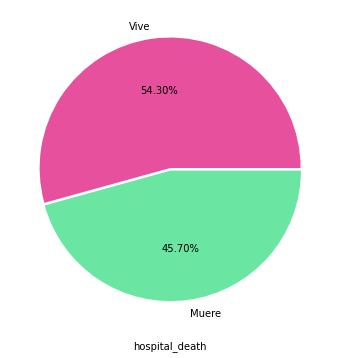

In [ ]:
plt.figure(figsize=(10,6))
colors=['#E6509D',"#6AE6A2"]
plt.pie(sub['hospital_death'].value_counts(),labels=['Muere','Vive'],autopct='%.2f%%',explode=[0.01,0.01],colors=colors);
plt.xlabel('hospital_death'); 